<a href="https://colab.research.google.com/github/jubchaves/Grafico_de_Hubble_usando_supernovas_Tipo_1a/blob/main/Gr%C3%A1fico_de_Hubble_usando_supernovas_Tipo_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/EP3-comp4'

/content/drive/MyDrive/EP3-comp4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import scipy.integrate as integrate


In [ ]:
# Carregar dados
dados = pd.read_csv("data.txt", sep = "	")
df = pd.DataFrame(dados)
df.columns =["Supernova Name", "Redshift", "Distance Modulus", "Distance Modulus Error", "Low mass galaxy probability"]


In [ ]:
df.head()

,Supernova Name,Redshift,Distance Modulus,Distance Modulus Error,Low mass galaxy probability
0,1993ag,0.050043,36.682368,0.166829,0.128419
1,1993o,0.052926,36.817691,0.155756,0.128419
2,1993b,0.070086,37.446737,0.158467,0.128419
3,1992bs,0.062668,37.483409,0.156099,0.128419
4,1992br,0.087589,38.229057,0.187746,0.128419


In [ ]:
# conversão dos módulos de distância para distância de luminosidade
df["Luminosity Distance (Mpc)"] = df["Distance Modulus"].apply(lambda x: 10**(((x + 5)/5)-6))
df["Luminosity Distance Error (Mpc)"] = df["Distance Modulus Error"].apply(lambda x: 10**(((x + 5)/5)-6))


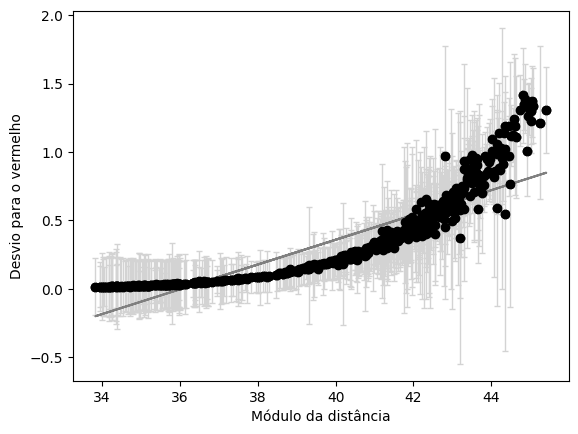

In [ ]:
#gráfico módulo de distância x redshift
model = LinearRegression()
model.fit(df[["Distance Modulus"]], df["Redshift"])
a = model.coef_
b = model.intercept_
plt.scatter(df["Distance Modulus"], df["Redshift"], color= "black")
plt.errorbar(df["Distance Modulus"], df["Redshift"], yerr=df["Distance Modulus Error"], fmt = "o", color='black', ecolor='lightgray', elinewidth=1, capsize=2)
plt.plot(df["Distance Modulus"], a*df["Distance Modulus"] + b, color = "grey")
plt.xlabel("Módulo da distância")
plt.ylabel("Desvio para o vermelho")
plt.show()

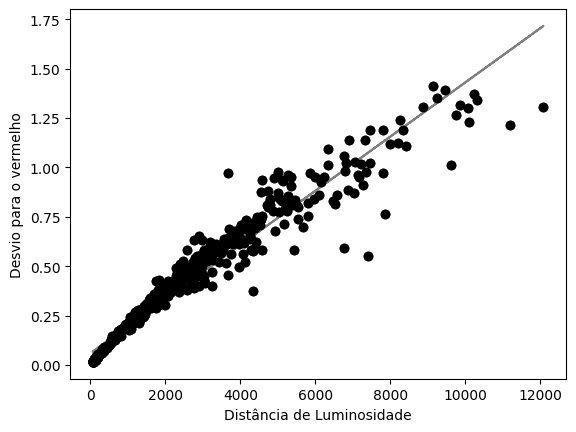

In [ ]:
#gráfico linear distância de luminosidade x redshift
model = LinearRegression()
model.fit(df[["Luminosity Distance (Mpc)"]], df["Redshift"])
a = model.coef_
b = model.intercept_
plt.scatter(df["Luminosity Distance (Mpc)"], df["Redshift"], color= "black")
plt.errorbar(df["Luminosity Distance (Mpc)"], df["Redshift"], yerr=df["Luminosity Distance Error (Mpc)"], fmt = "o", color='black', ecolor='lightgray', elinewidth=3, capsize=2)
plt.plot(df["Luminosity Distance (Mpc)"], a*df["Luminosity Distance (Mpc)"] + b, color = "grey")
plt.xlabel("Distância de Luminosidade")
plt.ylabel("Desvio para o vermelho")
plt.show()


Erro se torna irrisório e barras de erro não aparecem no gráfico


In [ ]:
#selecionar pequenos desvios para o vermelho
mascara = df["Redshift"] < 0.05
df[mascara].head()

,Supernova Name,Redshift,Distance Modulus,Distance Modulus Error,Low mass galaxy probability,Luminosity Distance (Mpc),Luminosity Distance Error (Mpc)
6,1992bo,0.017227,34.654370,0.199337,0.128419,85.285262,0.000011
7,1992bl,0.042233,36.336460,0.167174,0.128419,185.051202,0.000011
8,1992bh,0.045295,36.640272,0.164981,0.128419,212.840581,0.000011
9,1992bg,0.036480,35.905322,0.170175,0.128419,151.727532,0.000011
10,1992bc,0.019599,34.585217,0.184691,0.128419,82.612067,0.000011


In [ ]:
#calcular constante de Hubble sobre valores de baixo desvio para o vermelho
list_h0 = []
for i in range(6,11):
  z = df[mascara]["Redshift"][i]
  dl = df[mascara]["Luminosity Distance (Mpc)"][i]
  list_h0.append(299792*z/dl)
h0 = np.mean(list_h0)
print(h0)

67.1953929775292


In [ ]:
#aplicar constante calculada sobre demais valores
df["Linear Calculated Luminosity Distance (Mpc)"] = df['Redshift'].apply(lambda x: 299792*x/h0)
df.head()

,Supernova Name,Redshift,Distance Modulus,Distance Modulus Error,Low mass galaxy probability,Luminosity Distance (Mpc),Luminosity Distance Error (Mpc),Linear Calculated Luminosity Distance (Mpc)
0,1993ag,0.050043,36.682368,0.166829,0.128419,217.006920,0.000011,223.266661
1,1993o,0.052926,36.817691,0.155756,0.128419,230.960787,0.000011,236.129155
2,1993b,0.070086,37.446737,0.158467,0.128419,308.565458,0.000011,312.688433
3,1992bs,0.062668,37.483409,0.156099,0.128419,313.820905,0.000011,279.593053
4,1992br,0.087589,38.229057,0.187746,0.128419,442.396222,0.000011,390.778003


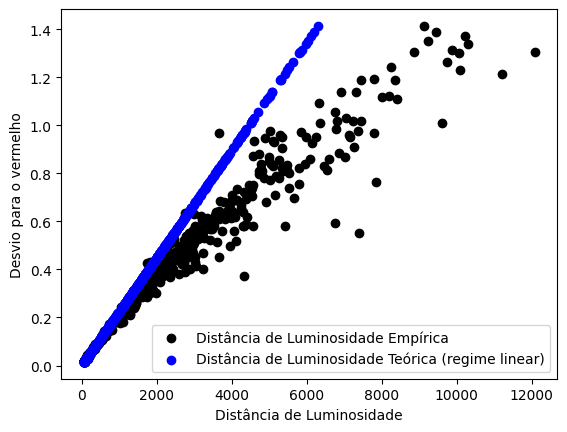

In [ ]:
#plotar esses resultados sobre os dados
plt.scatter(df["Luminosity Distance (Mpc)"], df["Redshift"], color= "black", label = "Distância de Luminosidade Empírica")
plt.scatter(df["Linear Calculated Luminosity Distance (Mpc)"], df["Redshift"], color= "blue", label = "Distância de Luminosidade Teórica (regime linear)")
plt.legend()
plt.xlabel("Distância de Luminosidade")
plt.ylabel("Desvio para o vermelho")
plt.show()


Pelo gráfico acima, vemos claramente que os dados de alto desvio para o vermelho não seguem o regime linear.

In [ ]:
#Ajuste não linear
def hubble_nao_linear(z, q):
    h0 = 70
    c = 299792
    return (c*z/h0)*(1+(1-q)*(z/2))

z = df['Redshift'].values
dl_empirico = df['Luminosity Distance (Mpc)'].values

parametros_opt, parametros_cov = curve_fit(hubble_nao_linear, z, dl_empirico)

q_opt = parametros_opt[0]

print(q_opt)

-0.1720951724181327


In [ ]:
#criação de uma coluna para o modelo não linear
h0 = 70
c = 299792
q = q_opt
df["Non-linear Calculated Luminosity Distance (Mpc)"] = df['Redshift'].apply(lambda z: (c*z/h0)*(1+(1-q)*(z/2)))
df.head()

,Supernova Name,Redshift,Distance Modulus,Distance Modulus Error,Low mass galaxy probability,Luminosity Distance (Mpc),Luminosity Distance Error (Mpc),Linear Calculated Luminosity Distance (Mpc),Non-linear Calculated Luminosity Distance (Mpc)
0,1993ag,0.050043,36.682368,0.166829,0.128419,217.006920,0.000011,223.266661,220.606826
1,1993o,0.052926,36.817691,0.155756,0.128419,230.960787,0.000011,236.129155,233.699059
2,1993b,0.070086,37.446737,0.158467,0.128419,308.565458,0.000011,312.688433,312.489020
3,1992bs,0.062668,37.483409,0.156099,0.128419,313.820905,0.000011,279.593053,278.247970
4,1992br,0.087589,38.229057,0.187746,0.128419,442.396222,0.000011,390.778003,394.376629


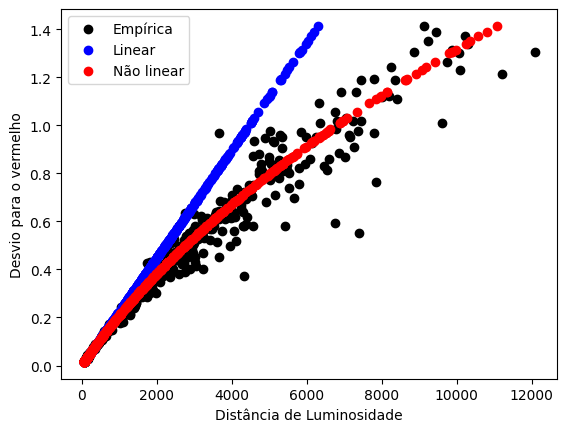

In [ ]:
plt.scatter(df["Luminosity Distance (Mpc)"], df["Redshift"], color= "black", label = "Empírica")
plt.scatter(df["Linear Calculated Luminosity Distance (Mpc)"], df["Redshift"], color= "blue", label = "Linear")
plt.scatter(df["Non-linear Calculated Luminosity Distance (Mpc)"], df["Redshift"], color= "red", label = "Não linear")
plt.xlabel("Distância de Luminosidade")
plt.ylabel("Desvio para o vermelho")
plt.legend()
plt.show()

In [ ]:
#cálculo da distância de luminosidade por FLRW
H0 = 70
omega_m = 0.3
def integrando(z, omega_m):
    return 299792 / (H0 * np.sqrt((omega_m * (1 + z)**3) + (1 - omega_m)))

df["FLRW Luminosity Distance"] = df['Redshift'].apply(lambda z: (1 + z) * integrate.quad(integrando, 0, z, args=(omega_m))[0])

df.head()

,Supernova Name,Redshift,Distance Modulus,Distance Modulus Error,Low mass galaxy probability,Luminosity Distance (Mpc),Luminosity Distance Error (Mpc),Linear Calculated Luminosity Distance (Mpc),Non-linear Calculated Luminosity Distance (Mpc),FLRW Calculated Luminosity Distance,FLRW Luminosity Distance
0,1993ag,0.050043,36.682368,0.166829,0.128419,217.006920,0.000011,223.266661,220.606826,222.486774,222.486774
1,1993o,0.052926,36.817691,0.155756,0.128419,230.960787,0.000011,236.129155,233.699059,235.792434,235.792434
2,1993b,0.070086,37.446737,0.158467,0.128419,308.565458,0.000011,312.688433,312.489020,316.061705,316.061705
3,1992bs,0.062668,37.483409,0.156099,0.128419,313.820905,0.000011,279.593053,278.247970,281.138321,281.138321
4,1992br,0.087589,38.229057,0.187746,0.128419,442.396222,0.000011,390.778003,394.376629,399.800544,399.800544


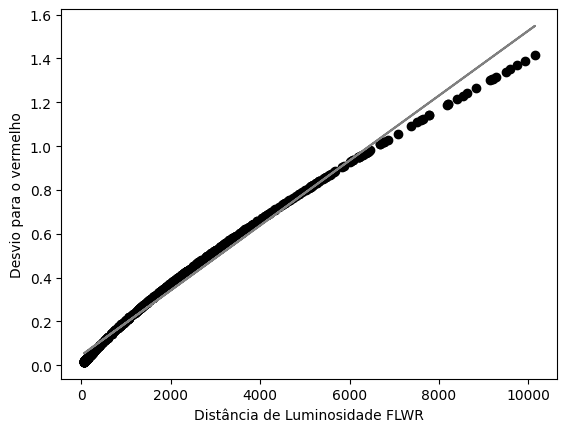

In [ ]:
#gráfico linear distância de luminosidade FLWR x redshift
model = LinearRegression()
model.fit(df[["FLRW Luminosity Distance"]], df["Redshift"])
a = model.coef_
b = model.intercept_
plt.scatter(df["FLRW Luminosity Distance"], df["Redshift"], color= "black")
plt.plot(df["FLRW Luminosity Distance"], a*df["FLRW Luminosity Distance"] + b, color = "grey")
plt.xlabel("Distância de Luminosidade FLWR")
plt.ylabel("Desvio para o vermelho")
plt.show()

In [ ]:
#ajuste linear - parametro de hubble em baixo desvio para o vermelho
list_h0 = []
for i in range(6,11):
  z = df[mascara]["Redshift"][i]
  dl = df[mascara]["FLRW Luminosity Distance"][i]
  list_h0.append(299792*z/dl)
h0 = np.mean(list_h0)
print(h0)

68.32375067251522


In [ ]:
#ajuste linear - cálculo linear a partir dos dados
df["Linear Calculated Luminosity Distance FLWR"] = df['Redshift'].apply(lambda x: 299792*x/h0)
df.head()

,Supernova Name,Redshift,Distance Modulus,Distance Modulus Error,Low mass galaxy probability,Luminosity Distance (Mpc),Luminosity Distance Error (Mpc),Linear Calculated Luminosity Distance (Mpc),Non-linear Calculated Luminosity Distance (Mpc),FLRW Calculated Luminosity Distance,FLRW Luminosity Distance,Linear Calculated Luminosity Distance FLWR
0,1993ag,0.050043,36.682368,0.166829,0.128419,217.006920,0.000011,223.266661,220.606826,222.486774,222.486774,219.579442
1,1993o,0.052926,36.817691,0.155756,0.128419,230.960787,0.000011,236.129155,233.699059,235.792434,235.792434,232.229514
2,1993b,0.070086,37.446737,0.158467,0.128419,308.565458,0.000011,312.688433,312.489020,316.061705,316.061705,307.524425
3,1992bs,0.062668,37.483409,0.156099,0.128419,313.820905,0.000011,279.593053,278.247970,281.138321,281.138321,274.975611
4,1992br,0.087589,38.229057,0.187746,0.128419,442.396222,0.000011,390.778003,394.376629,399.800544,399.800544,384.324356


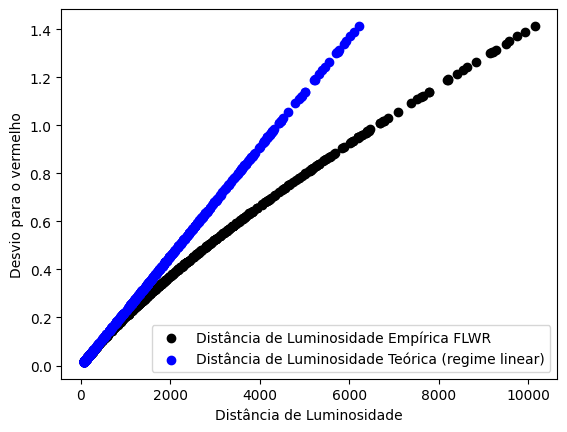

In [ ]:
#plotar esses resultados sobre os dados
plt.scatter(df["FLRW Luminosity Distance"], df["Redshift"], color= "black", label = "Distância de Luminosidade Empírica FLWR")
plt.scatter(df["Linear Calculated Luminosity Distance FLWR"], df["Redshift"], color= "blue", label = "Distância de Luminosidade Teórica (regime linear)")
plt.legend()
plt.xlabel("Distância de Luminosidade")
plt.ylabel("Desvio para o vermelho")
plt.show()


In [ ]:
#ajuste não linear sob FLWR - cálculo de q otimizado
def hubble_nao_linear(z, q):
    h0 = 70
    c = 299792
    return (c*z/h0)*(1+(1-q)*(z/2))

z = df['Redshift'].values
dl_empirico = df["FLRW Luminosity Distance"].values

parametros_opt, parametros_cov = curve_fit(hubble_nao_linear, z, dl_empirico)

q_opt = parametros_opt[0]

print(q_opt)

-0.07711132387289443


In [ ]:
#ajuste não linear sob FLWR
h0 = 70
c = 299792
q = q_opt
df["Non-linear Calculated Luminosity Distance FLWR"] = df['Redshift'].apply(lambda z: (c*z/h0)*(1+(1-q)*(z/2)))
df.head()

,Supernova Name,Redshift,Distance Modulus,Distance Modulus Error,Low mass galaxy probability,Luminosity Distance (Mpc),Luminosity Distance Error (Mpc),Linear Calculated Luminosity Distance (Mpc),Non-linear Calculated Luminosity Distance (Mpc),FLRW Calculated Luminosity Distance,FLRW Luminosity Distance,Linear Calculated Luminosity Distance FLWR,Non-linear Calculated Luminosity Distance FLWR
0,1993ag,0.050043,36.682368,0.166829,0.128419,217.006920,0.000011,223.266661,220.606826,222.486774,222.486774,219.579442,220.097462
1,1993o,0.052926,36.817691,0.155756,0.128419,230.960787,0.000011,236.129155,233.699059,235.792434,235.792434,232.229514,233.129315
2,1993b,0.070086,37.446737,0.158467,0.128419,308.565458,0.000011,312.688433,312.489020,316.061705,316.061705,307.524425,311.489931
3,1992bs,0.062668,37.483409,0.156099,0.128419,313.820905,0.000011,279.593053,278.247970,281.138321,281.138321,274.975611,277.449179
4,1992br,0.087589,38.229057,0.187746,0.128419,442.396222,0.000011,390.778003,394.376629,399.800544,399.800544,384.324356,392.816212


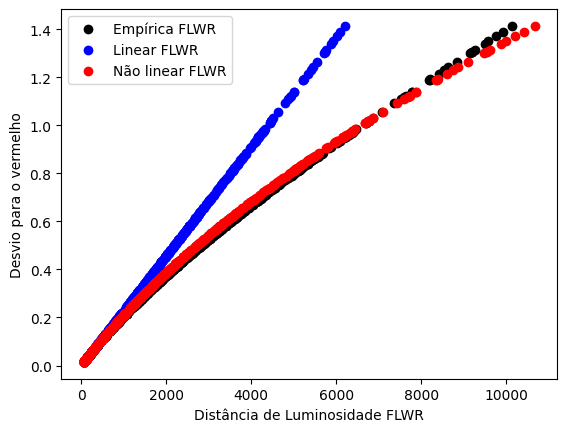

In [ ]:
#ajuste não linear sob FLWR - gráfico
plt.scatter(df["FLRW Luminosity Distance"], df["Redshift"], color= "black", label = "Empírica FLWR")
plt.scatter(df["Linear Calculated Luminosity Distance FLWR"], df["Redshift"], color= "blue", label = "Linear FLWR")
plt.scatter(df["Non-linear Calculated Luminosity Distance FLWR"], df["Redshift"], color= "red", label = "Não linear FLWR")
plt.xlabel("Distância de Luminosidade FLWR")
plt.ylabel("Desvio para o vermelho")
plt.legend()
plt.show()

In [ ]:
#significancia estatística do dado encontrado q < 0
std_q = np.sqrt(parametros_cov[0][0]) #parametros_cov = matriz de covariância associada
inf = q_opt - 3*std_q
sup = q_opt + 3*std_q
print(inf, sup)

-0.0893127414713803 -0.06490990627440857


Analisando a variação de q sob 3 desvios padrões, podemos afirmar que q < 0, ou, equivalentemente, gamma_lambda > 0, sob o coeficiente de confiança de 99,7 %.